# АИСД-2, КДЗ №2
Васильев Владислав Петрович, БПИ 217\
В данном .ipynb файле происходит запуск и компиляция кодов с алгоритмами на языке C++, а также рисование сравнительных графиков.
Измерение времени происходит в наносекундах

naive - наивный алгоритм  
kmp_standart - алгоритм КПМ с применением стандартных граней  
kmp_updated - алгоритм КМП с применением уточненных граней  
z_function - алгоритм поиска с помощью Z-функции  

Все выводы по графикам находятся в файле "conclusion.pdf"

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random

plt.rcParams['figure.figsize']=[18,9]
methods = ['naive', 'kmp_standart', 'kmp_updated','z_function']

# Генерация строк и шаблонов
Все строки и шаблоны находятся в директории data, в которой содержатся поддиректории:  
small_2 - строка из символов '0', '1' размера 10000\
big_2 - строка из символов '0', '1' размера 100000\
small_4 - строка из символов '0', '1', '2', '3' размера 10000\
big_4 -  строка из символов '0', '1', '2', '3' размера 100000

В каждой поддиректории находится файл со строкой, в которой выполняется поиск - search_string.txt, а также директория templates с шаблонами для данной строки. Шаблоны для i символов подстановок находятся в директории substitution_{i}, в которой файлы имеют вид   
template_{длина шаблона}.txt


In [2]:
strings = {"small_2":''.join([str(random.choice([0,1])) for _ in range(10000)]),
            "big_2":''.join([str(random.choice([0,1])) for _ in range(100000)]),
            "small_4":''.join([str(random.choice([0,1,2,3])) for _ in range(10000)]),
            "big_4":''.join([str(random.choice([0,1,2,3])) for _ in range(100000)])}

for string_name in strings:
    string = strings[string_name]
    with open(f"data/{string_name}/search_string.txt", "w") as file:
            file.write(string)
    for i in range(5):
        for length in range(100,3001,100):
            with open(f"data/{string_name}/templates/substitution_{i}/template_{length}.txt", "w") as file:
              index = random.randint(len(string)*45/100, len(string)*55/100)
              template = string[index:index+length]
              substitutions  = random.sample(range(length),i)
              for sub in substitutions:
                  template = template[:sub]+'?'+template[(sub+1):]
              file.write(template)
        

# Компиляция программ и заполнение файлов c временными характеристиками

Все директории, соотвествующие алгоритмам поиска, находятся в директории methods

Все файлы с временными характеристиками находятся в тех же директориях, что и .cpp файл с рассматриваемым алгоритмом. Данные файлы расположены в директории time, в каждой из которых есть поддиректории, название которых соответсвует видам рассматриваемых строк. В каждой их вышеуказанных директорий находятся файлы вида substitution_{i}.txt, данные которых соотвествуют результатам временных измерений работы алгоритмов с шаблонам рассматриваемой длины (от 100 до 3000 с шагом 1000).

Аргументы компиляции:\
argv[1] - путь к файлу, текст которого -  строка, в которой выполняется поиск    
argv[2] - путь к файлу, текст которого -  шаблон поиска  
argv[3] - количество подстановок в тексте  
argv[4] - путь к файлу, в который записывается время работы алгоритма  
argv[5] - количество запусков работы алгоритма (для усреднения результата по времени)


In [3]:
number_of_repetitions = 100
for method in methods:
    ! g++ -std=c++17 methods/{method}/main.cpp -o methods/{method}/main.out
    for string in strings:
        for i in range(5):  
            result_path = f"methods/{method}/time/{string}/substitution_{i}.txt"
            search_str_path = f"data/{string}/search_string.txt"
            with open(result_path,'w') as file:
                 pass
            for length in range(100, 3001, 100):
                template_str_path = f"data/{string}/templates/substitution_{i}/template_{length}.txt"
                ! ./methods/{method}/main.out {search_str_path} {template_str_path} {i} {result_path} {number_of_repetitions}

# Сравнение алгоритмов между собой

В данной части представлено рисование графиков, на которых происходит сравнение всех алгоритмов по времени работы (в наносекундах) при поиске различных шаблонов в строке.

Названия графиков имеют вид "длина строки | длина алфавита | количество подстановок"

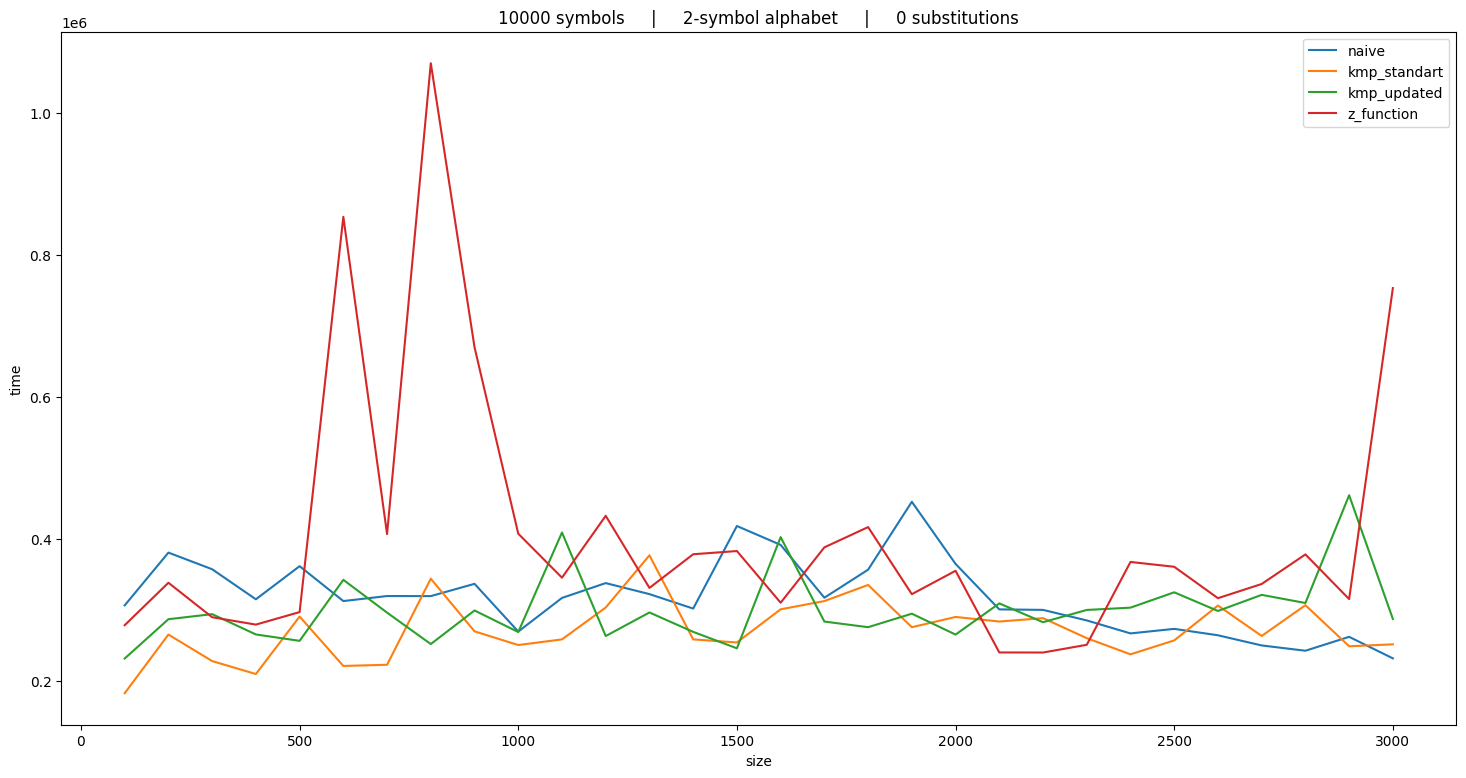

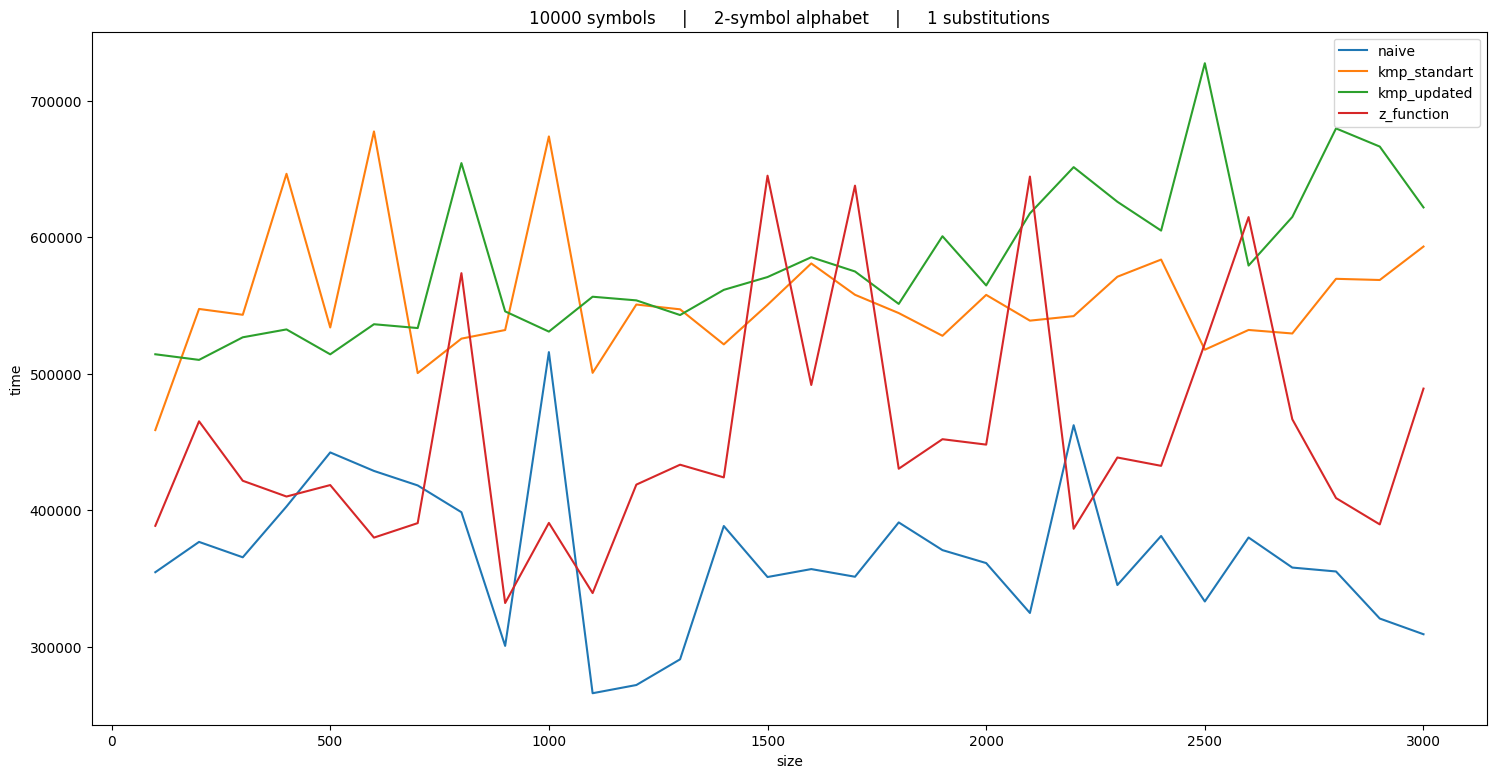

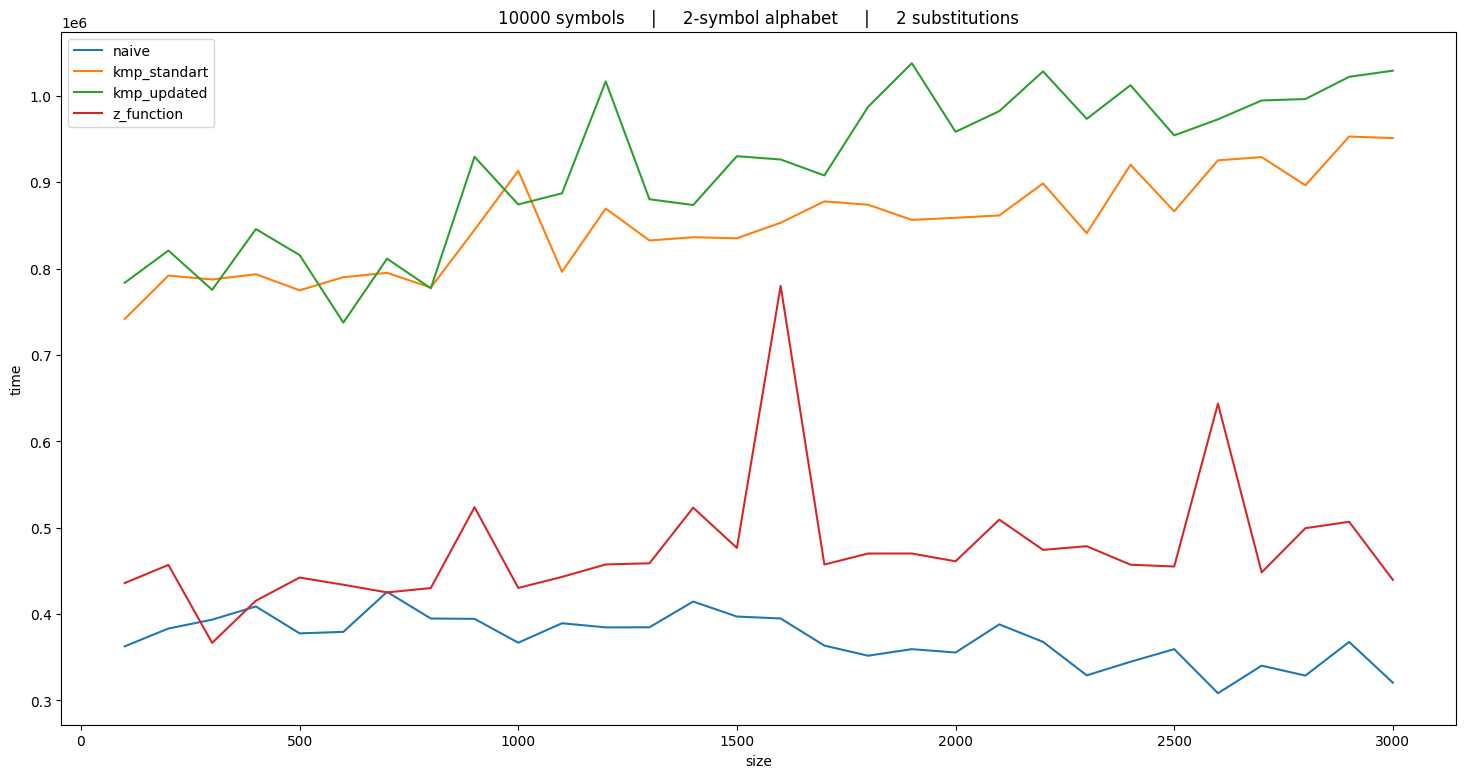

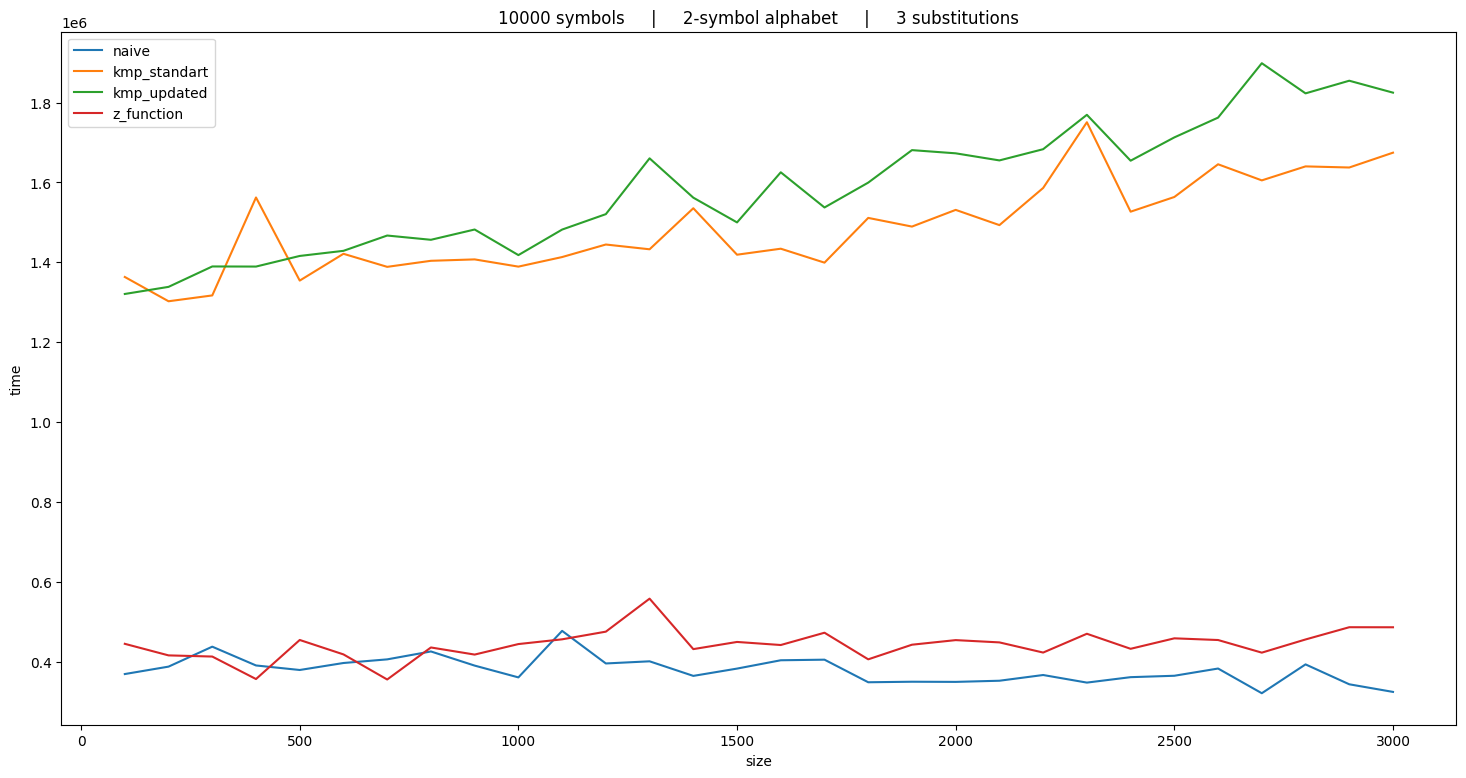

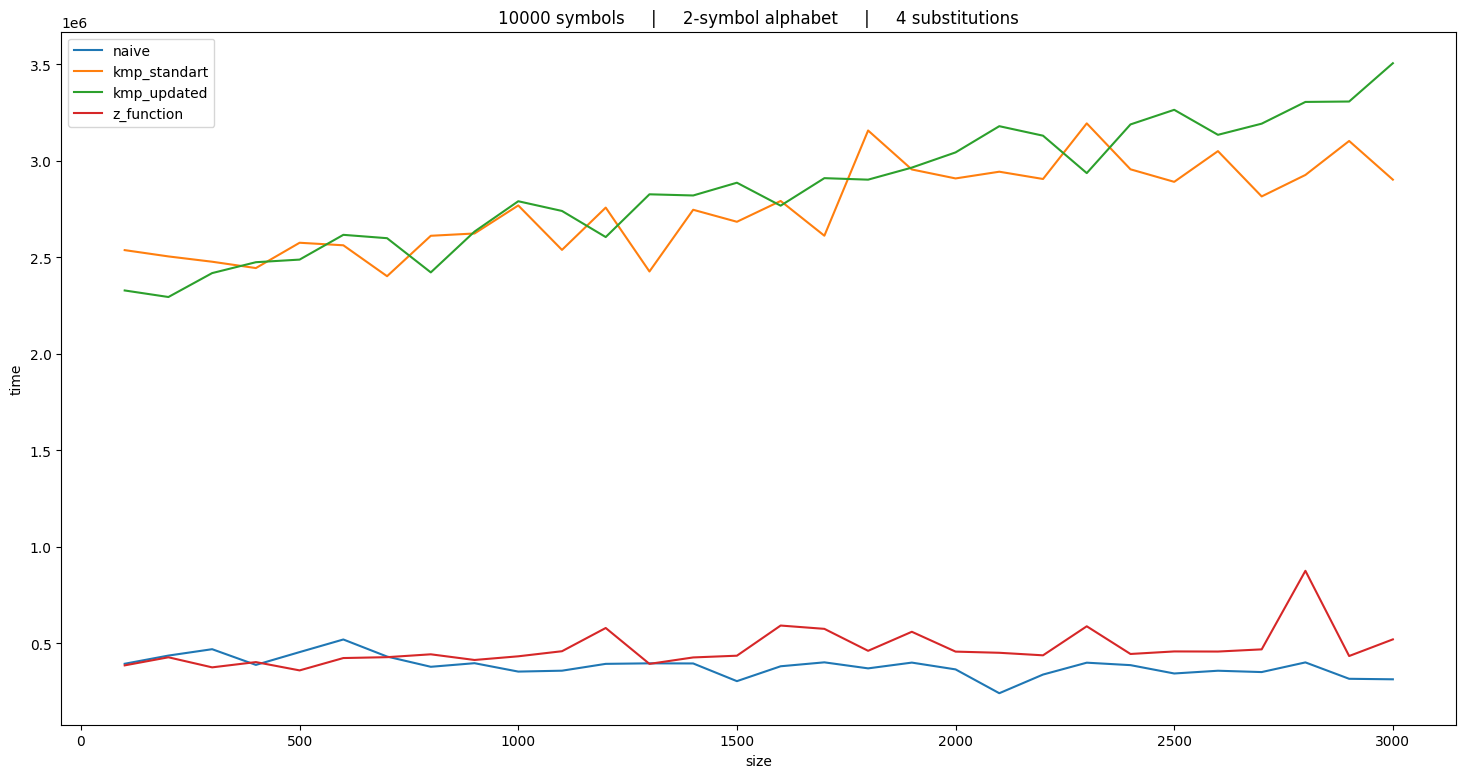

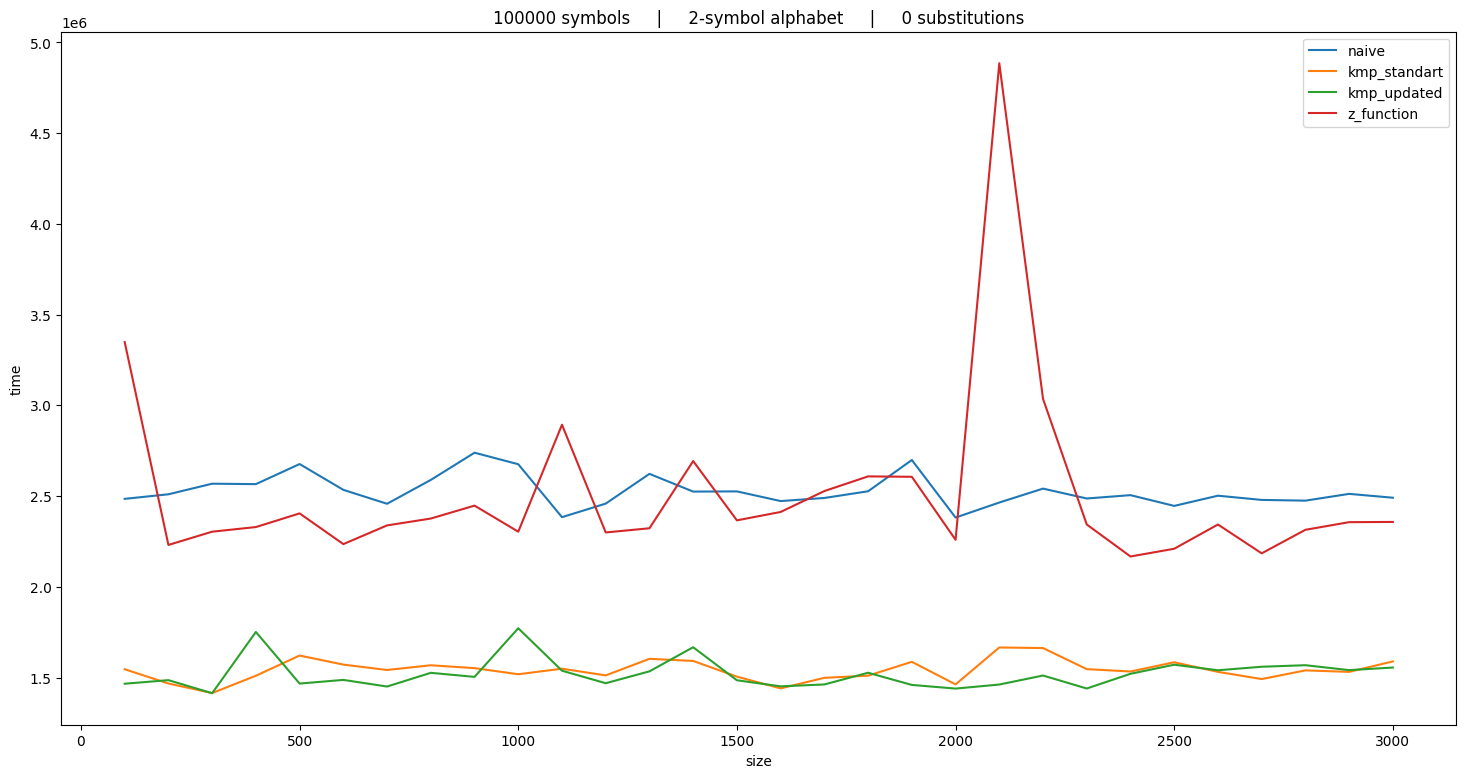

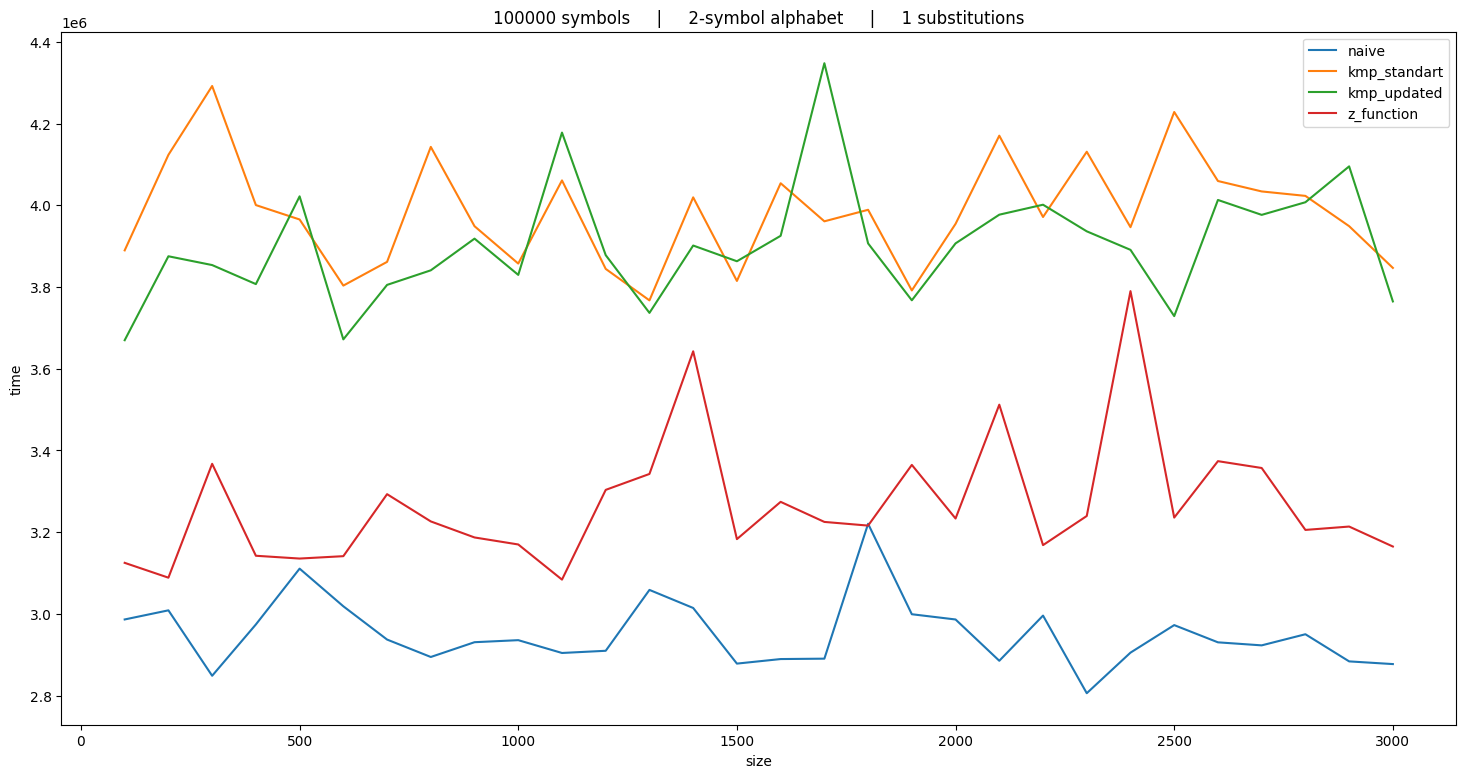

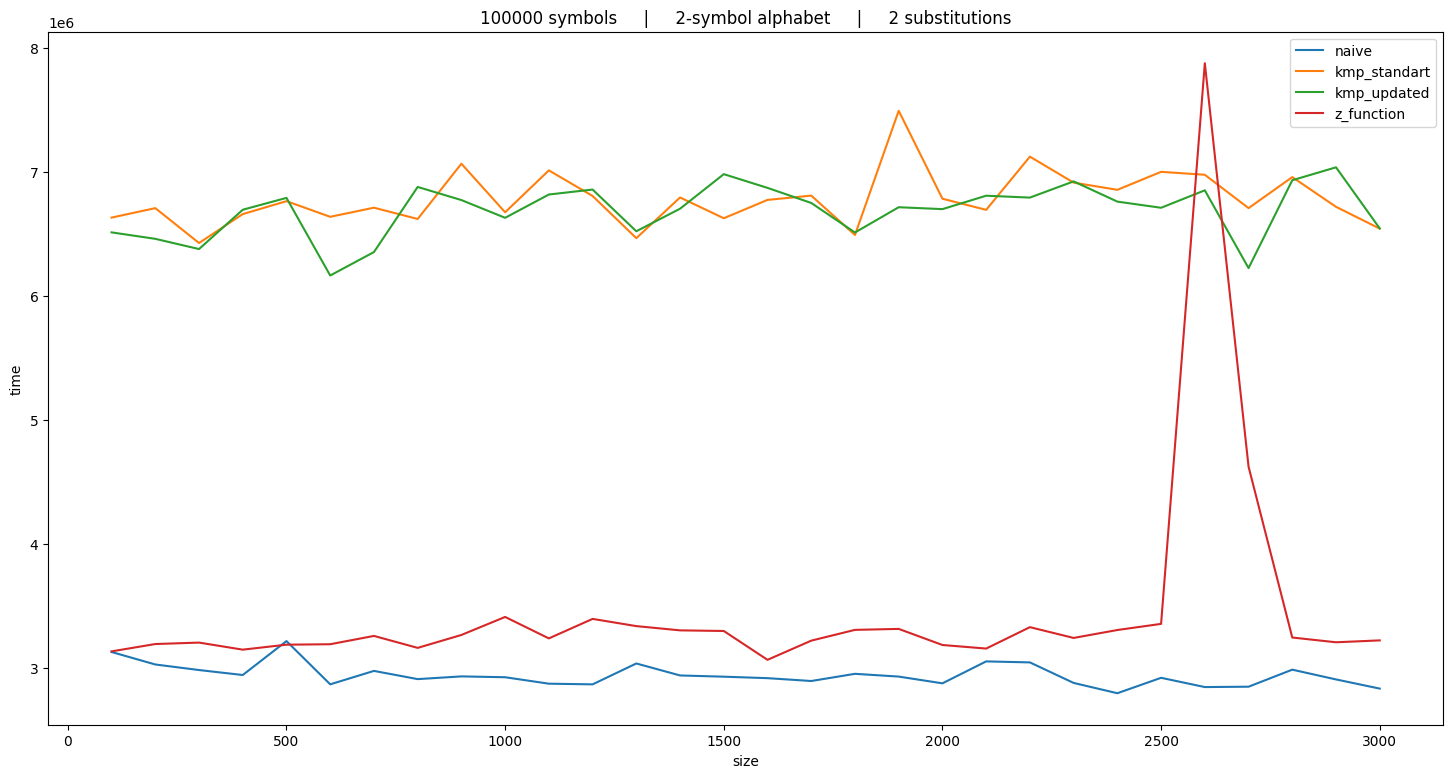

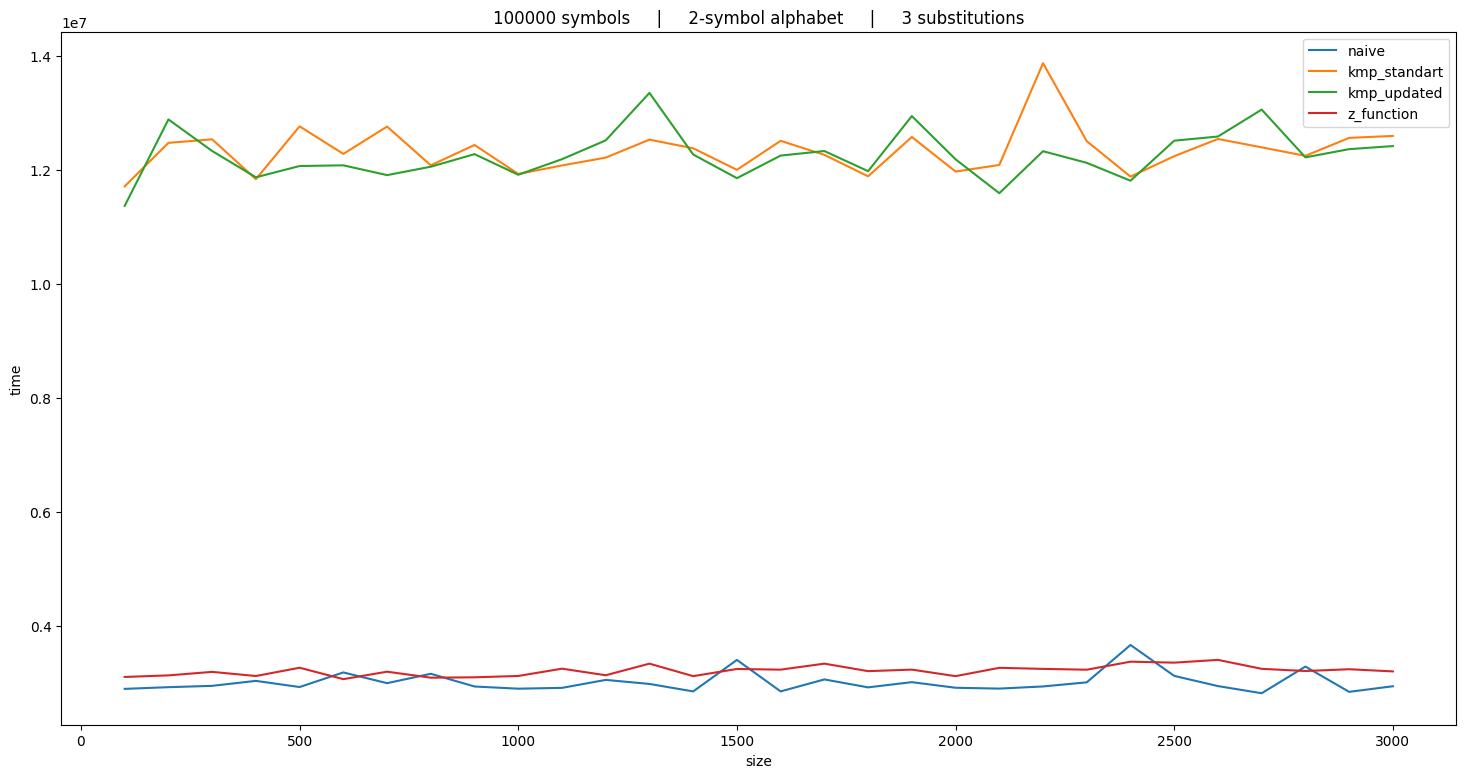

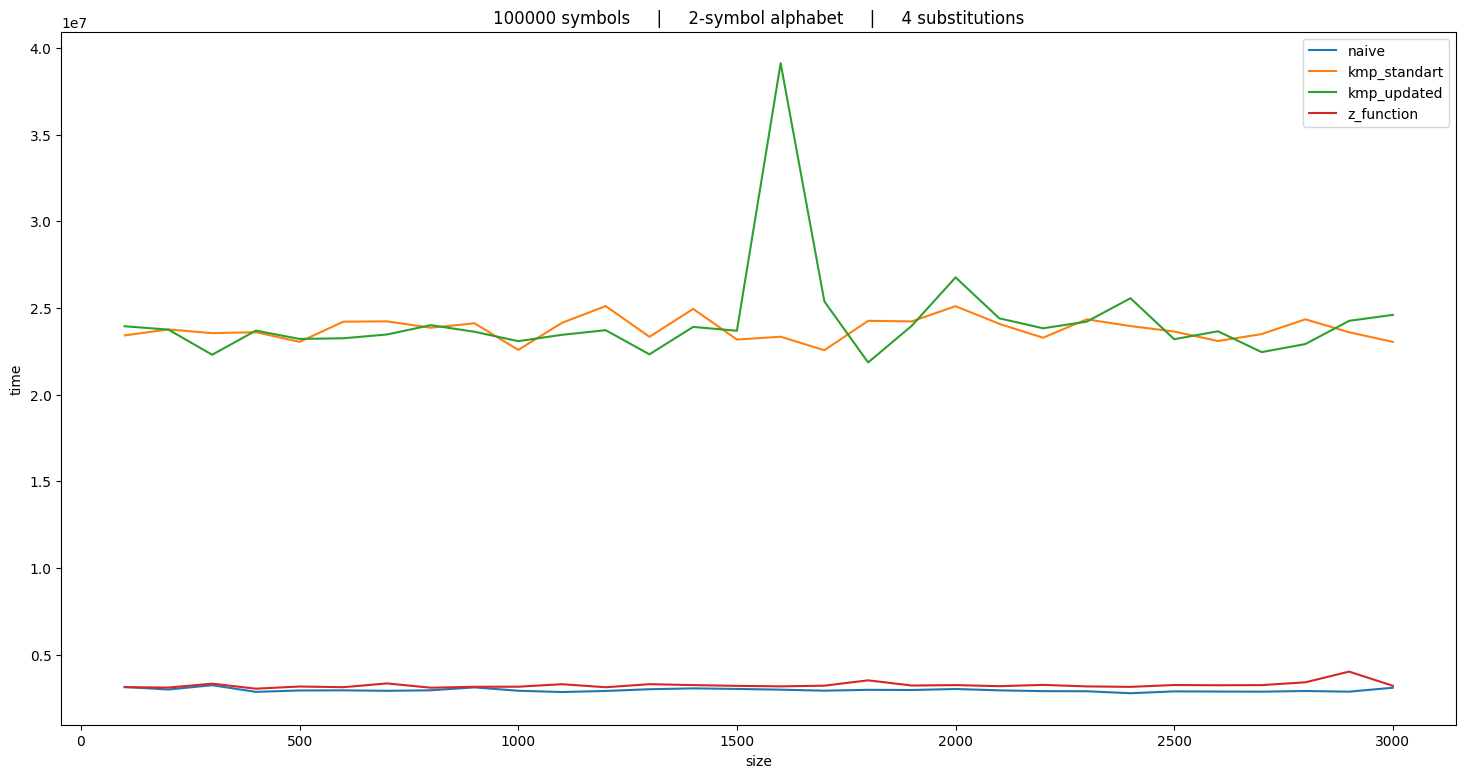

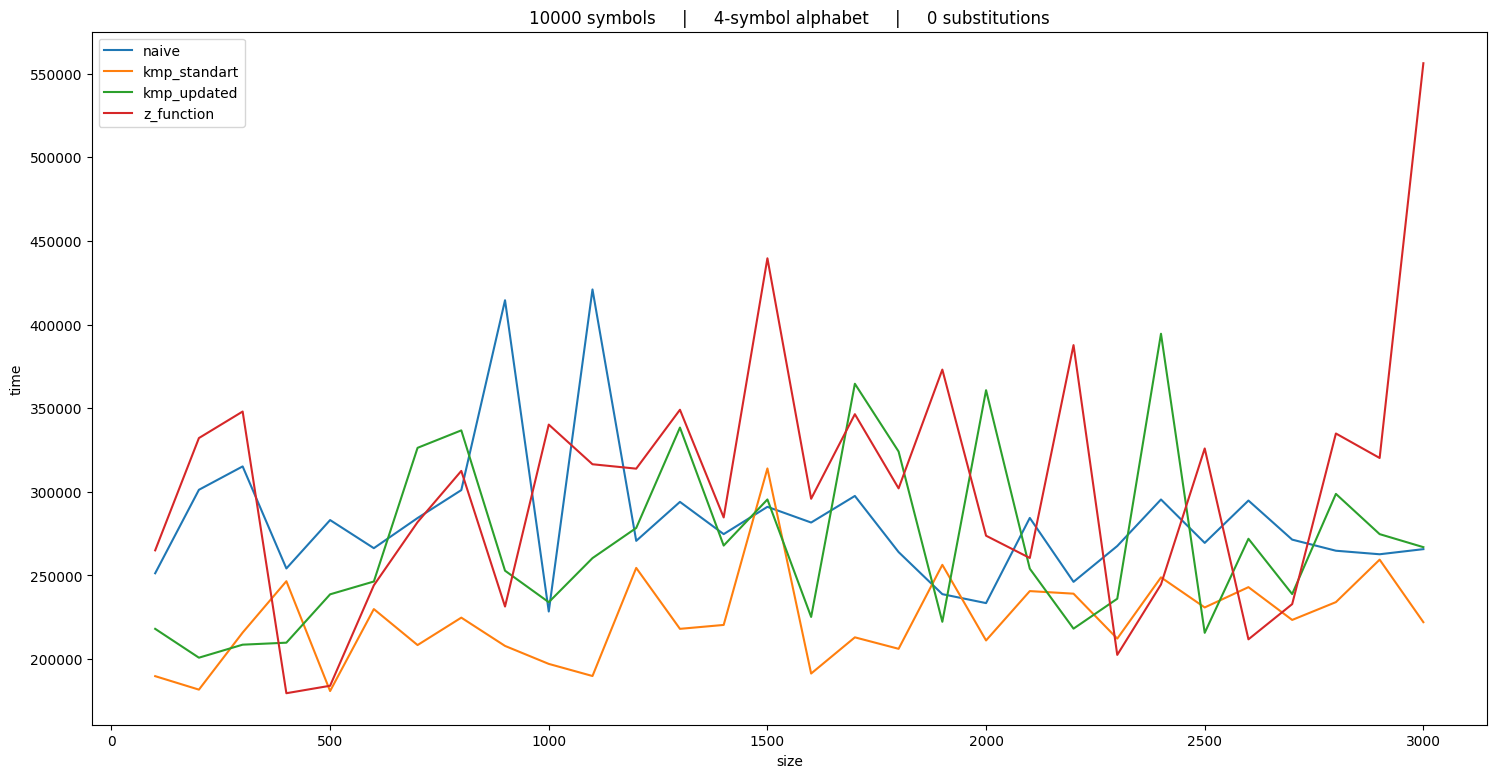

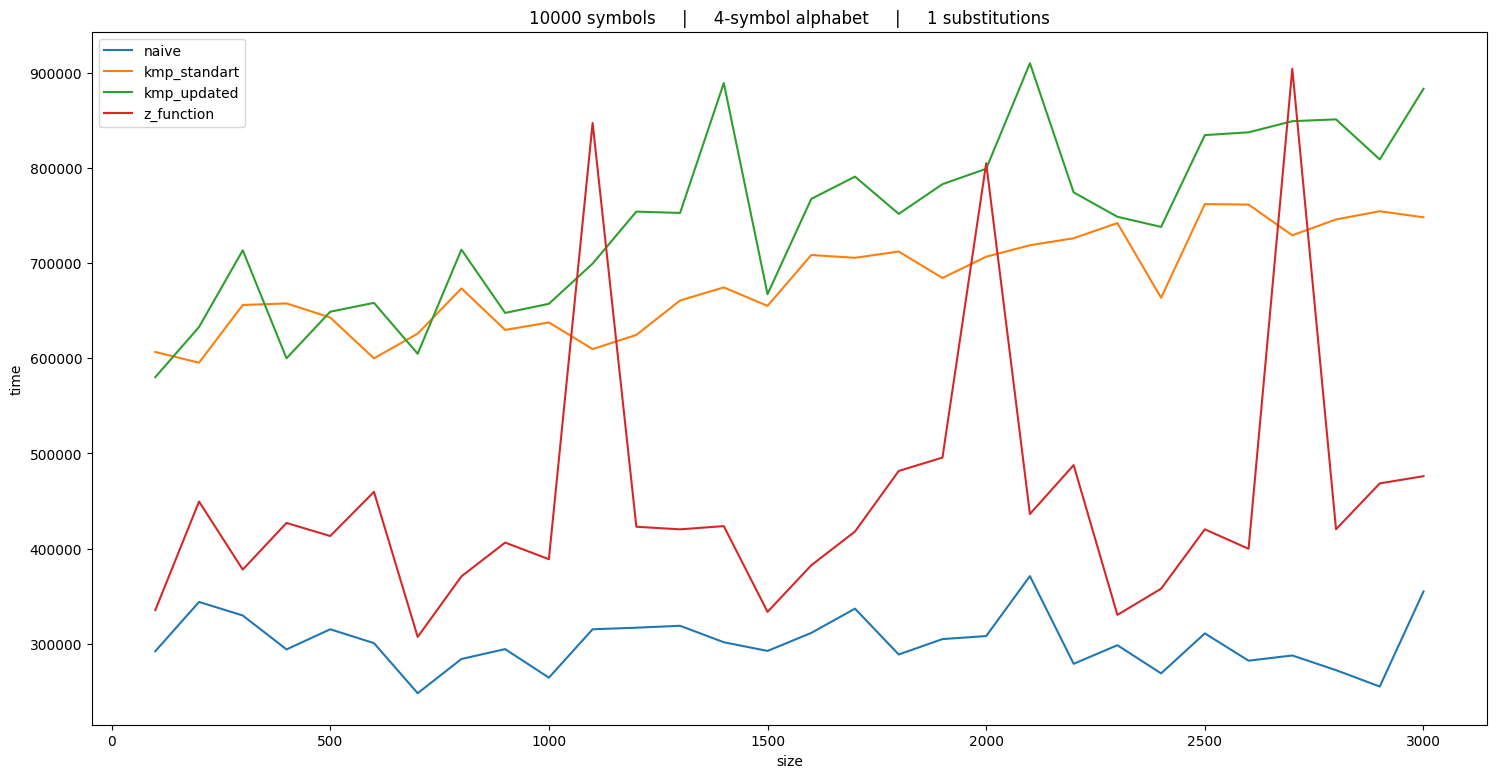

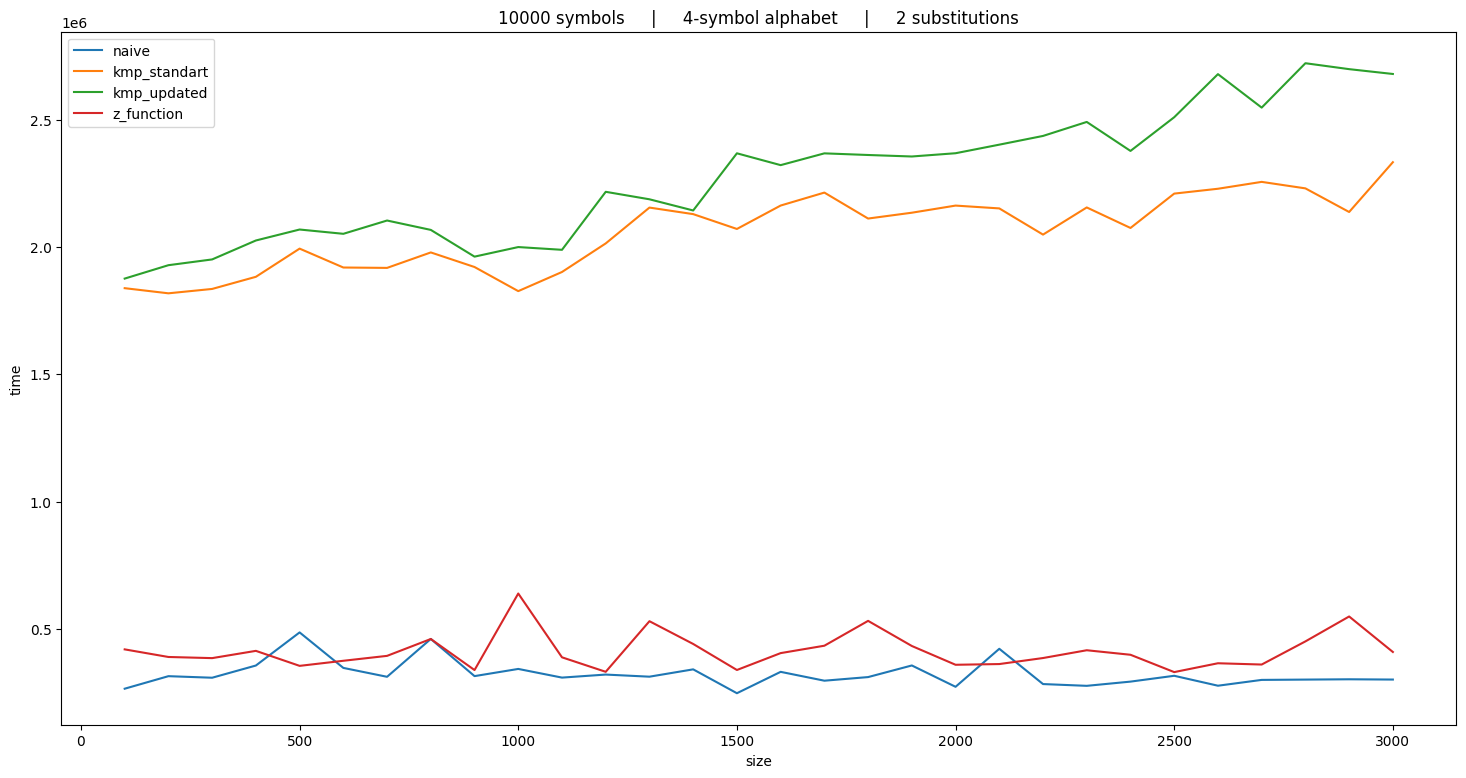

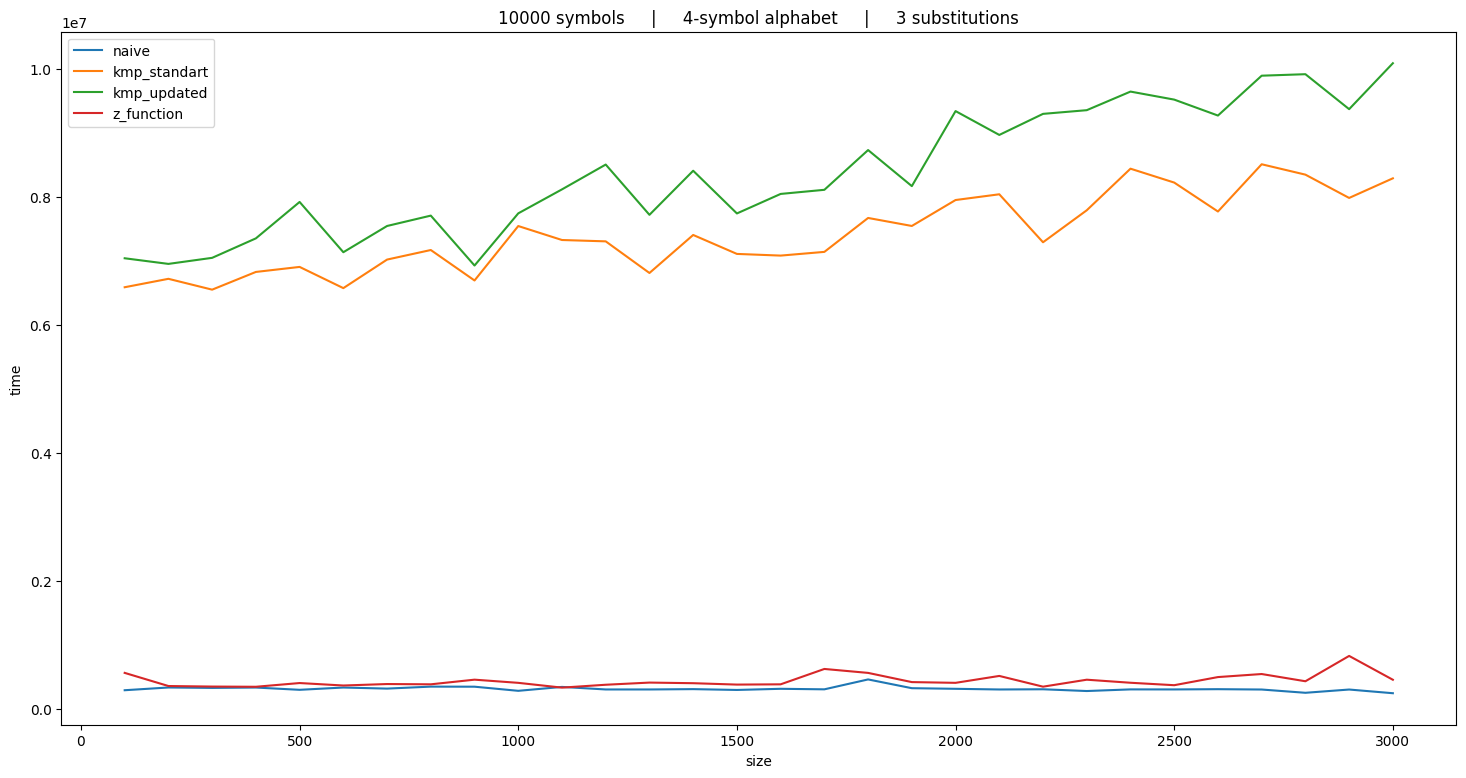

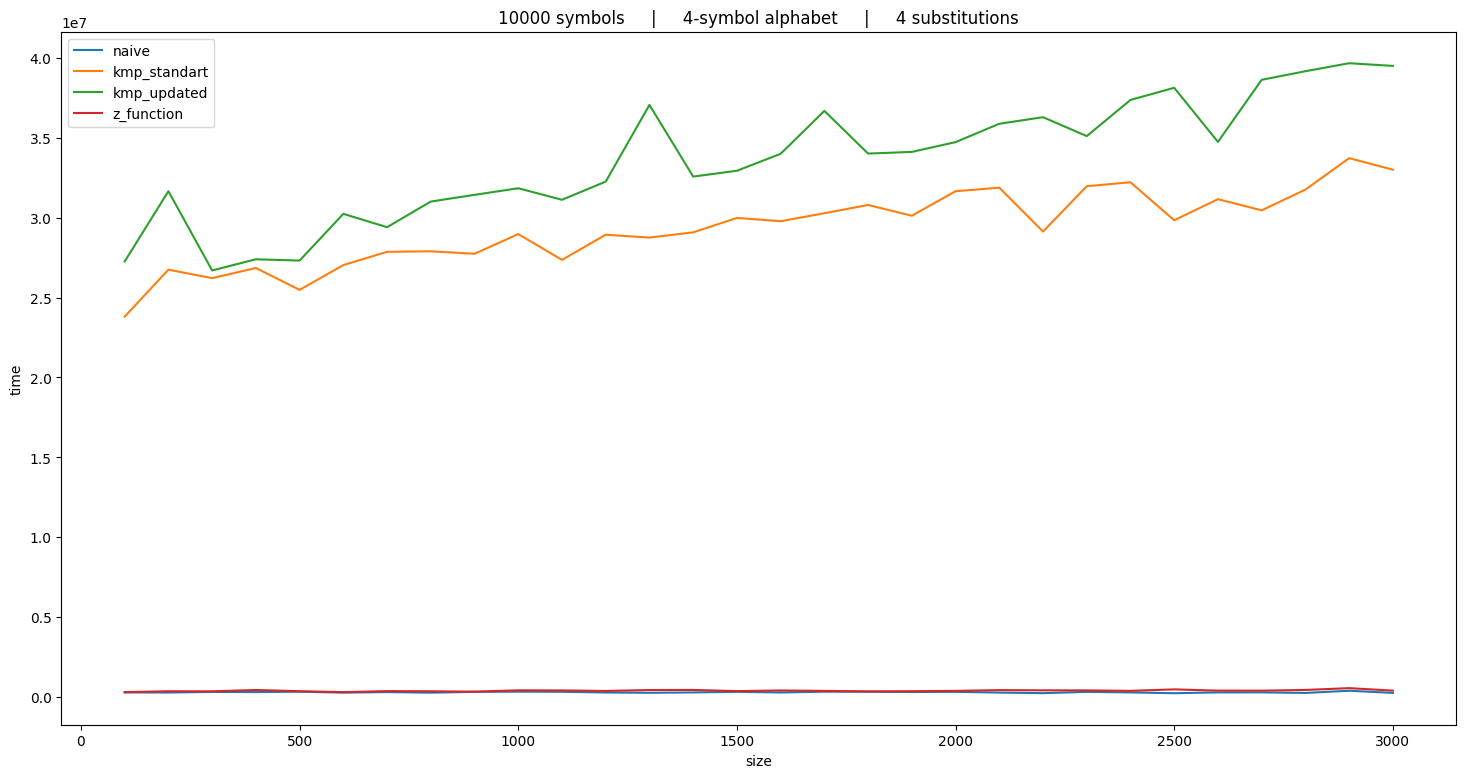

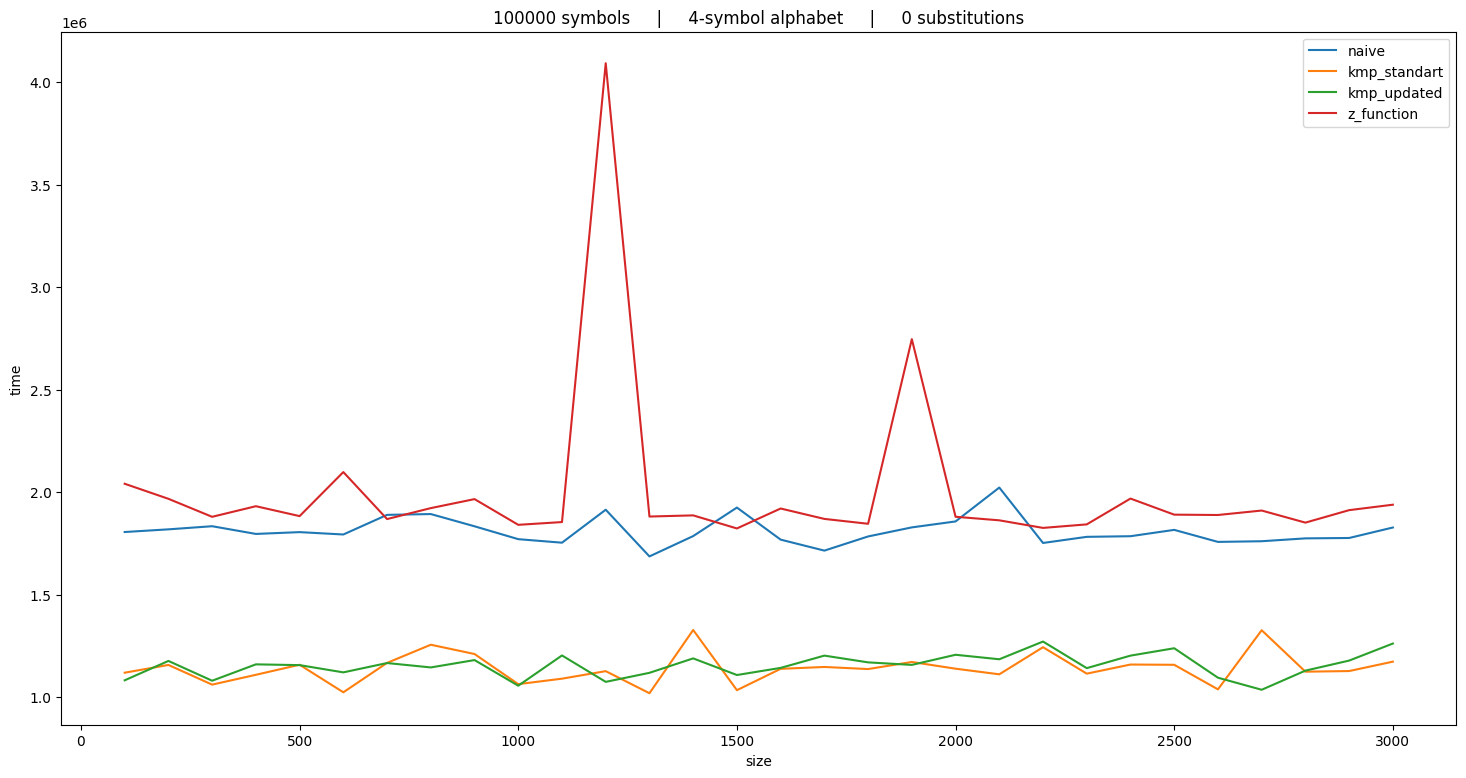

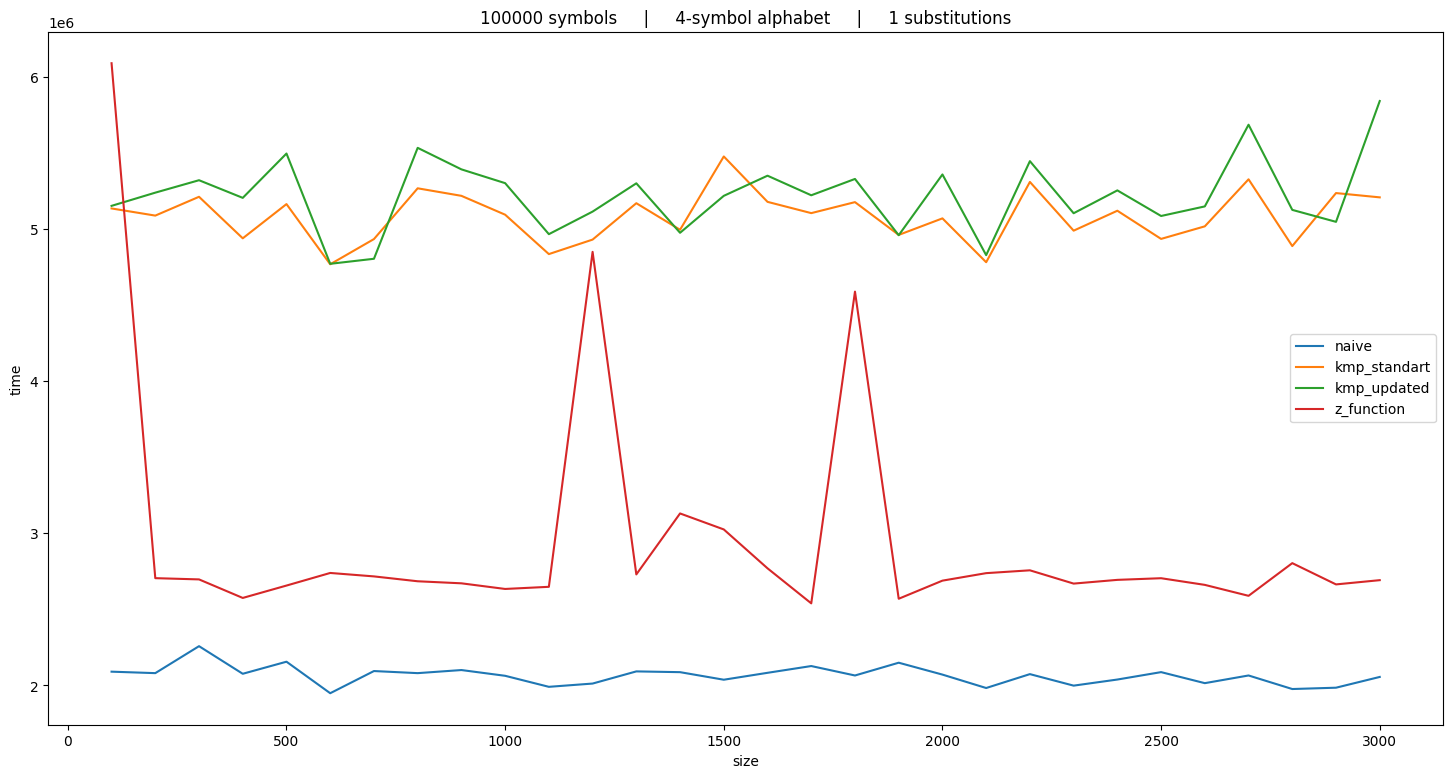

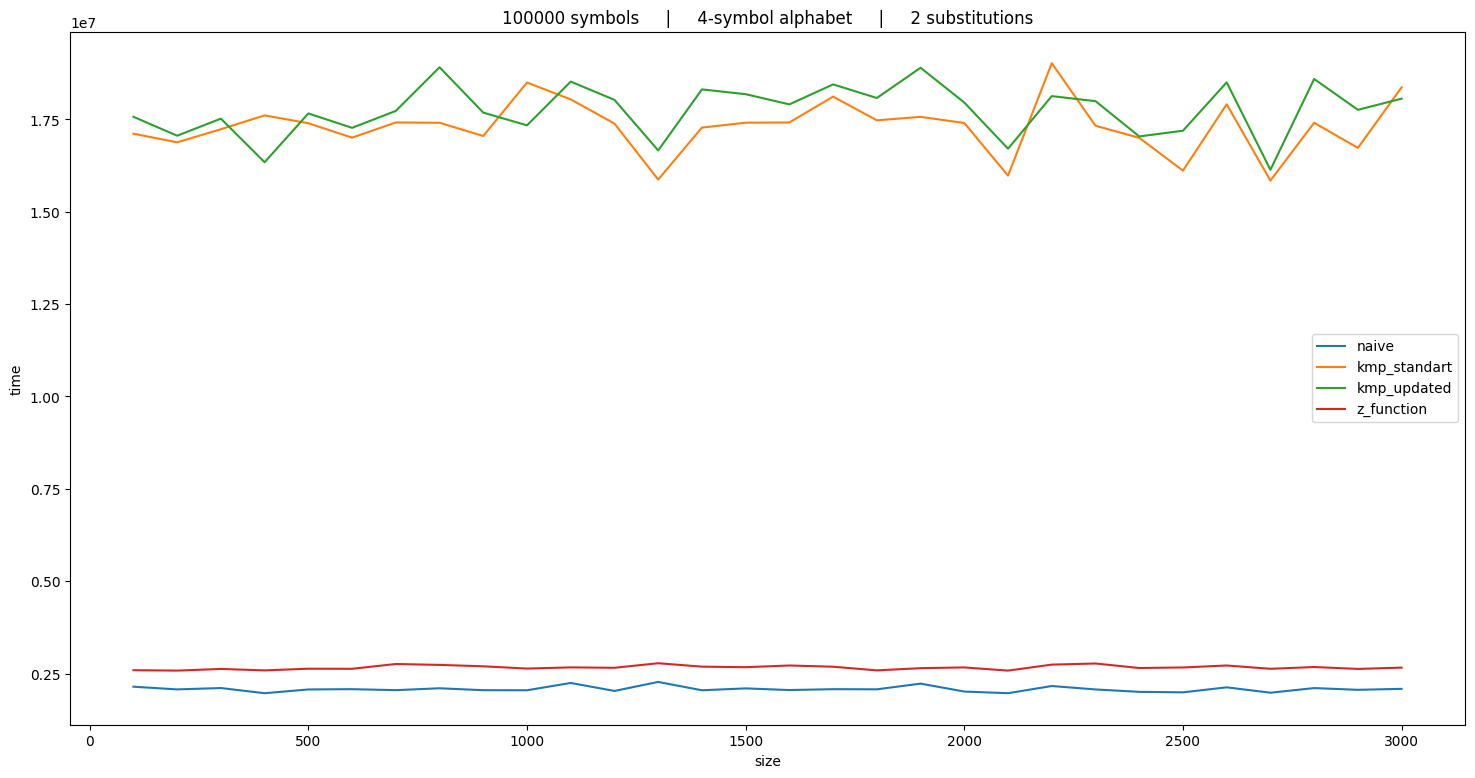

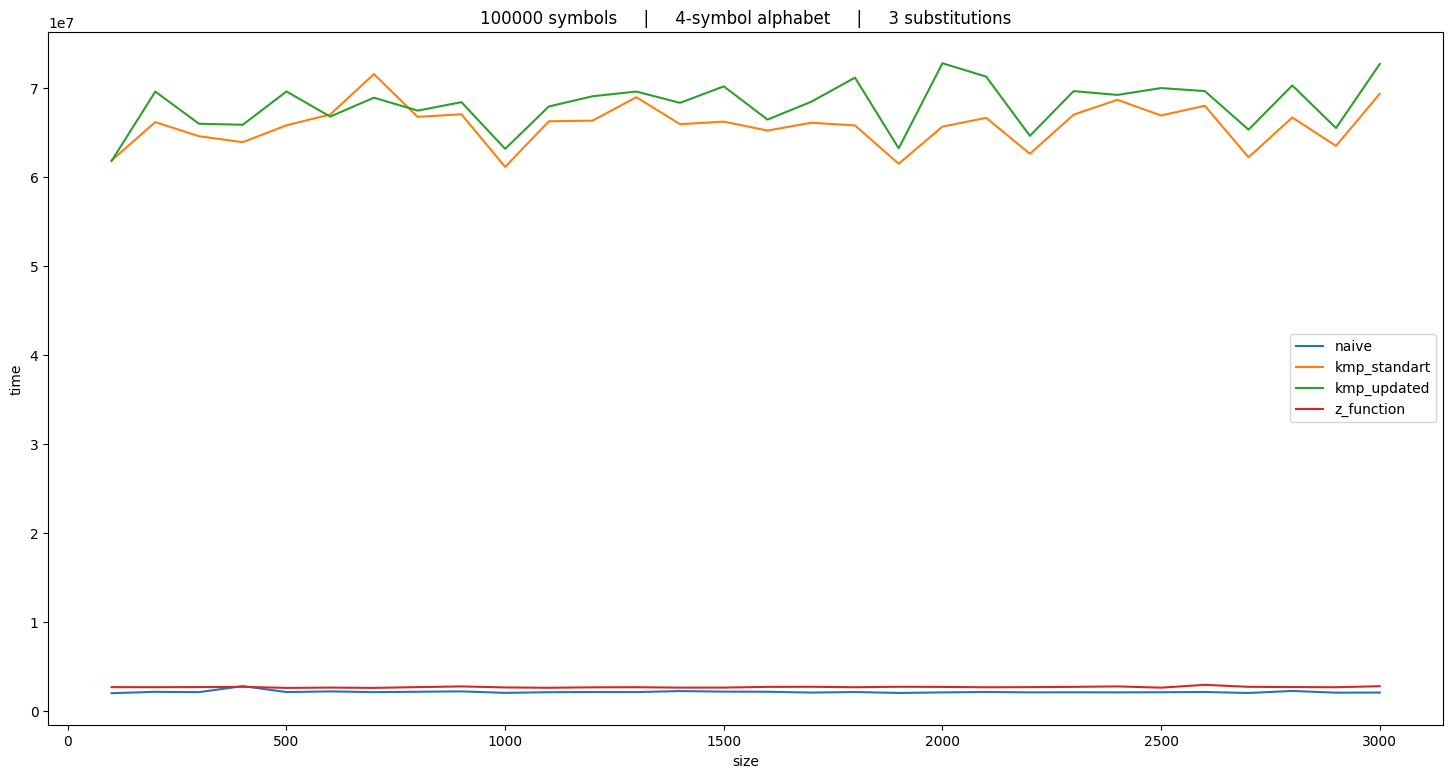

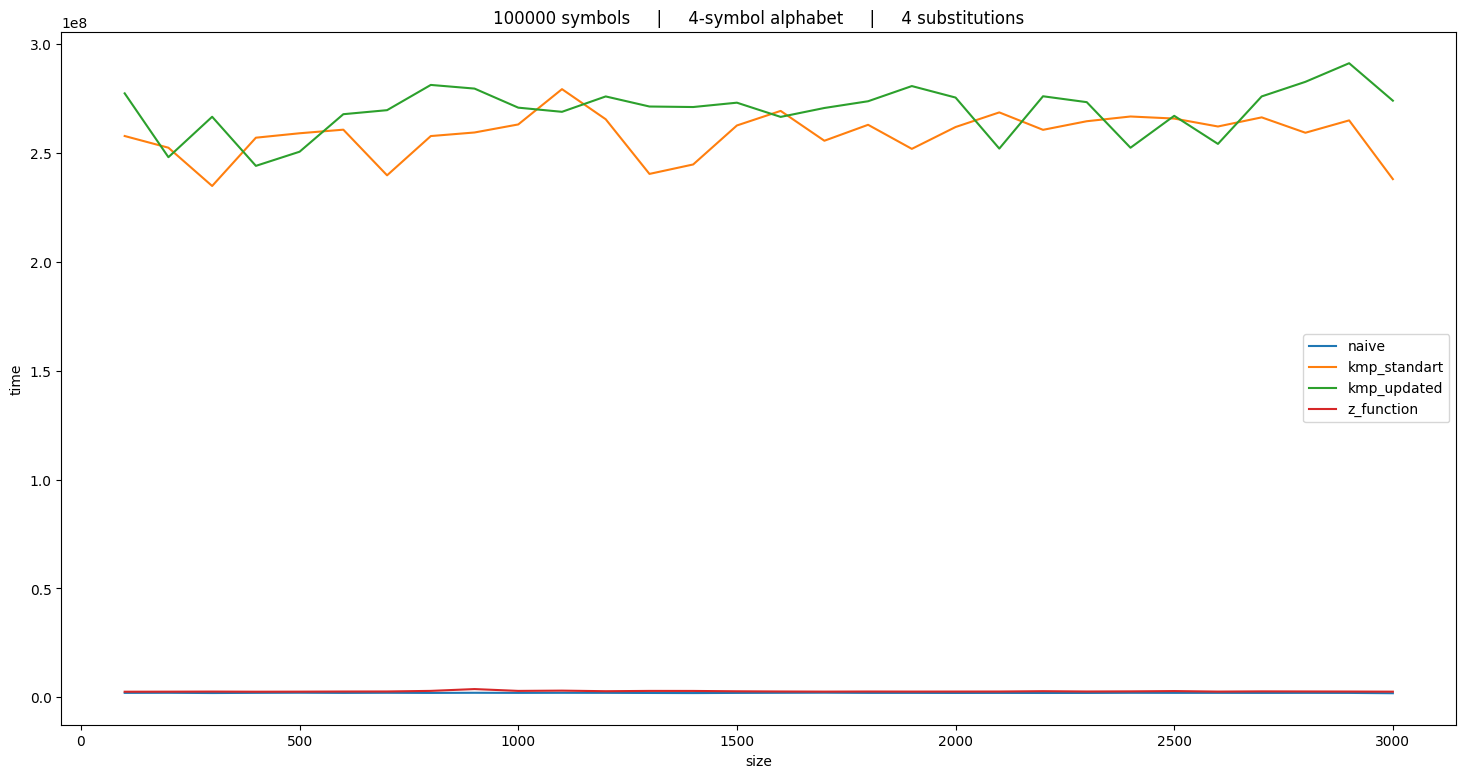

In [4]:
for string in strings:
    for i in range(5):
        comparison = {}
        comparison["size"] = list(range(100, 3001, 100))
        for method in methods:
            with open(f"methods/{method}/time/{string}/substitution_{i}.txt", 'r') as file:
                comparison[method] = list(map(int, file.readlines()[0].split()))
        plot = pd.DataFrame.from_dict(comparison).set_index("size").plot()
        plot.set_ylabel("time")
        length = "100000" if string[0]=='b' else "10000"
        plot.set_title(f"{length} symbols     |     {string[-1]}-symbol alphabet     |     {i} substitutions")